# HST.508 HW2

# Problem 1

## Problem 1 a

In [307]:
from utils import plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

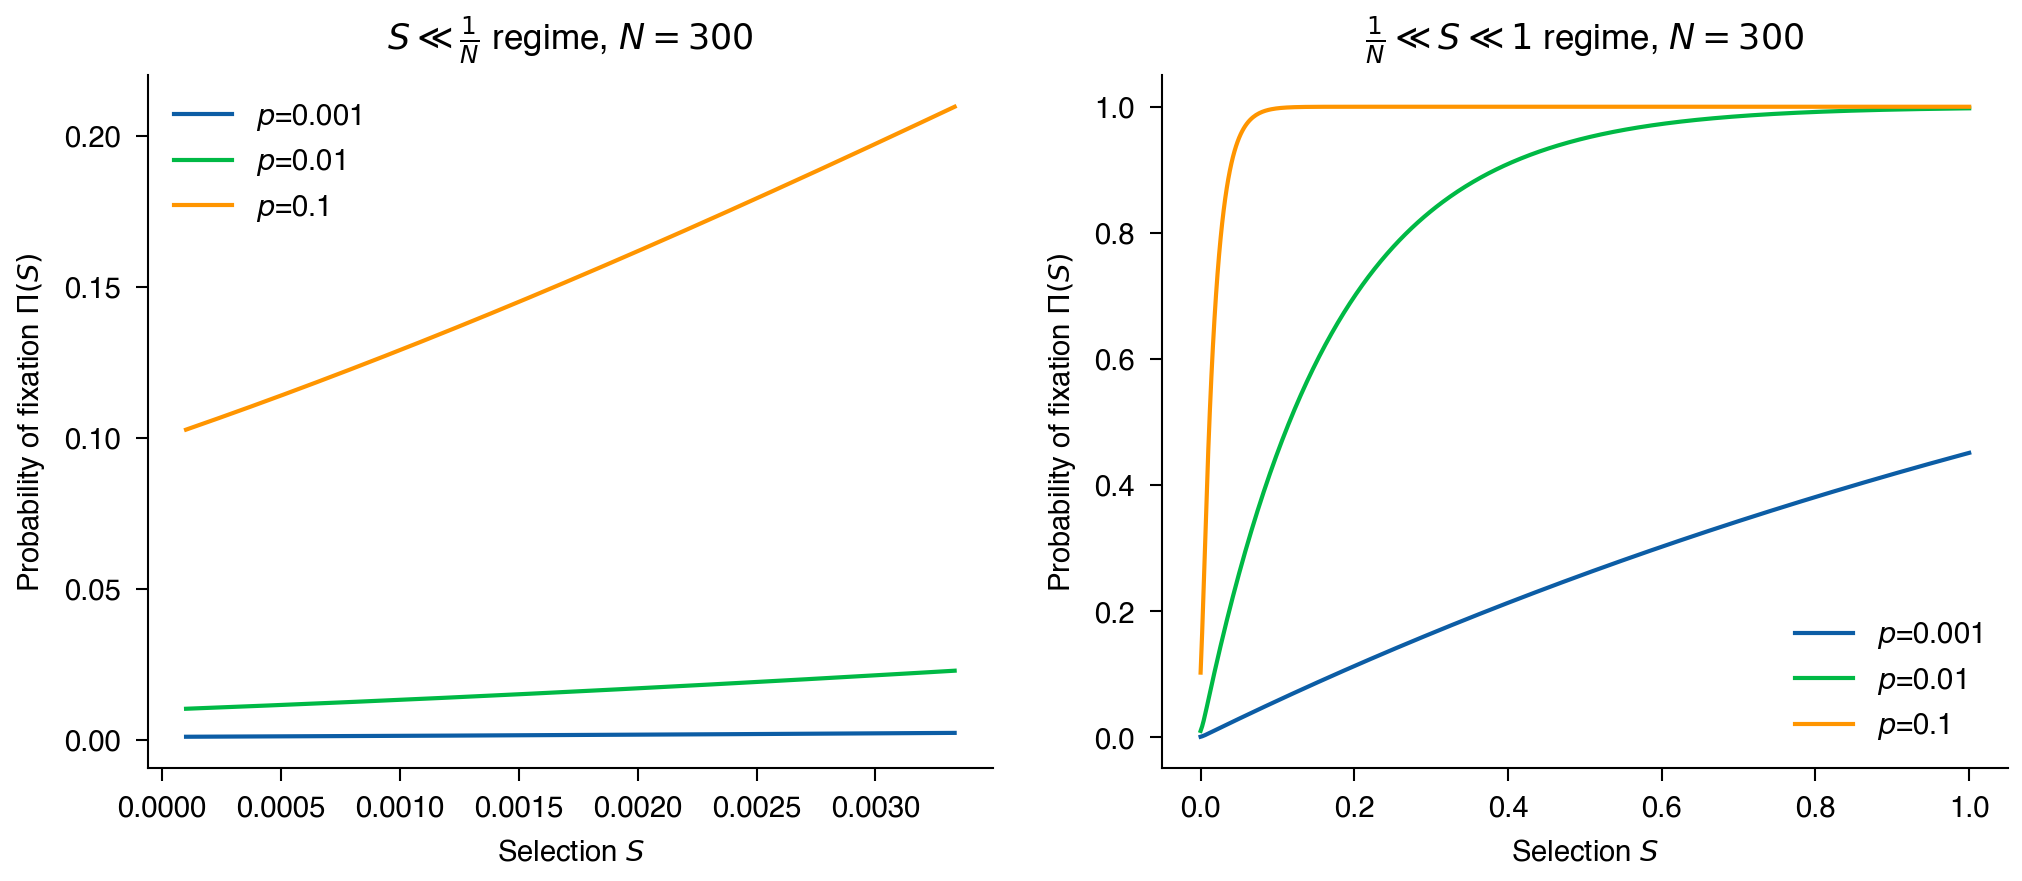

In [308]:
def probability_of_fixation(N,S,p):
    return (1-np.exp(-2*N*S*p))/(1-np.exp(-2*N*S))
N = 300
ps = [0.001,0.01,0.1]

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

Ss = np.linspace(start=1e-4, stop=1/N, num=500)
ax[0].set_ylabel("Probability of fixation $\Pi(S)$")
ax[0].set_xlabel("Selection $S$")
ax[0].set_title(r"$S \ll \frac{1}{N}$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,y=probability_of_fixation(N,Ss,p), ax=ax[0], label=f"$p$={p:.2g}")

Ss = np.linspace(start=1e-4, stop=1, num=500)
ax[1].set_ylabel("Probability of fixation $\Pi(S)$")
ax[1].set_xlabel("Selection $S$")
ax[1].set_title(r"$\frac{1}{N} \ll S \ll 1$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,y=probability_of_fixation(N,Ss,p), ax=ax[1], label=f"$p$={p:.2g}")

## Problem 1 b

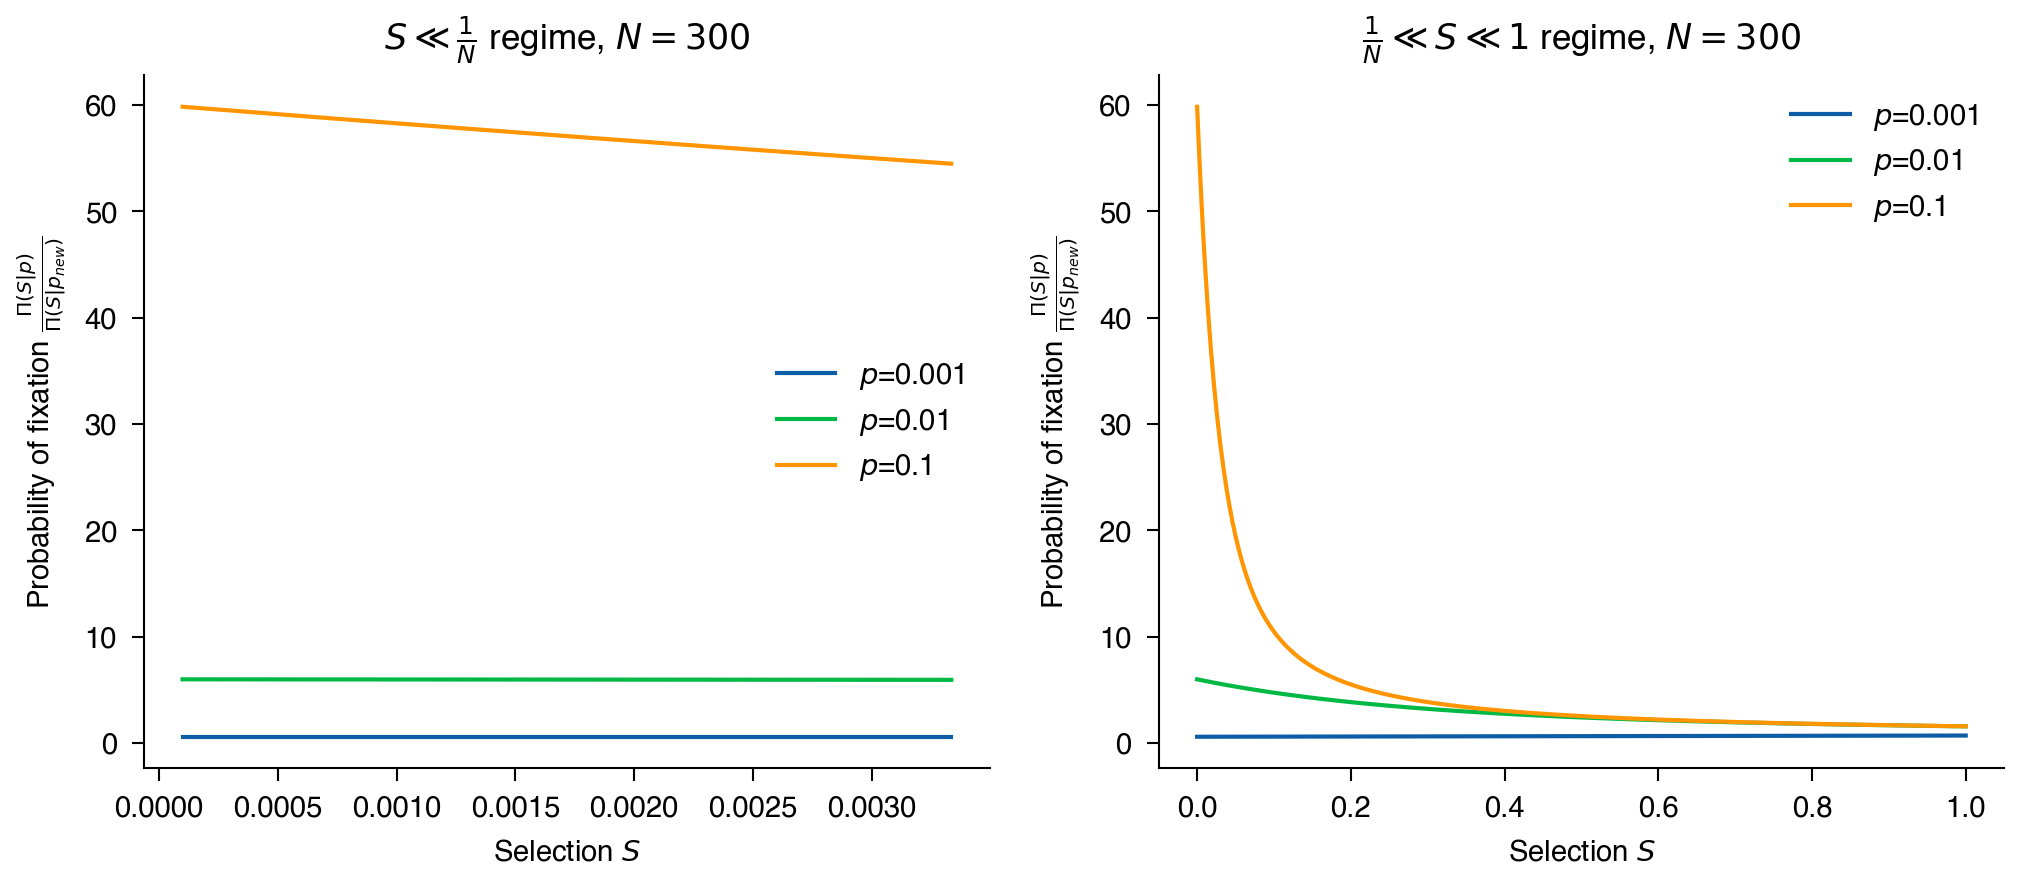

In [309]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

N = 300
p_new = 1/(2*N)
ps = [0.001,0.01,0.1]

Ss = np.linspace(start=1e-4, stop=1/N, num=500)
ax[0].set_ylabel(r"Probability of fixation $\frac{\Pi(S|p)}{\Pi(S|p_{new})}$")
ax[0].set_xlabel("Selection $S$")
ax[0].set_title(r"$S \ll \frac{1}{N}$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,y=probability_of_fixation(N,Ss,p)/probability_of_fixation(N,Ss,p_new), ax=ax[0], label=f"$p$={p:.2g}")

Ss = np.linspace(start=1e-4, stop=1, num=500)
ax[1].set_ylabel(r"Probability of fixation $\frac{\Pi(S|p)}{\Pi(S|p_{new})}$")
ax[1].set_xlabel("Selection $S$")
ax[1].set_title(r"$\frac{1}{N} \ll S \ll 1$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,y=probability_of_fixation(N,Ss,p)/probability_of_fixation(N,Ss,p_new), ax=ax[1], label=f"$p$={p:.2g}")

## Problem 1 c

$$\Pi(p)=C_1 e^{-2NSp}+C_2$$
$$\begin{aligned}
\Pi(f)&=1 &
\Pi(0)&=0 &
\end{aligned}$$

$$\Pi(0)=0=C_1+C_2\implies C_2=-C_1$$
$$\Pi(f)=1=C_1e^{-2NSf}+C_2\implies C_2=1-C_1e^{-2NSf}$$

$$1-C_1e^{-2NSf}=-C_1 \implies C_1=\frac{1}{e^{-2NSf}-1}$$

$$\Pi(p)=C_1e^{-2NSp}-C_1=\frac{e^{-2NSp}-1}{e^{-2NSf}-1}$$
$$\Pi(p)=\frac{1-e^{-2NSp}}{1-e^{-2NSf}}$$

$$p=-\frac{1}{2NS}\ln\left[1-\Pi(p)\left(1-e^{-2NSf}\right)\right]$$

In [310]:
def initial_freq_near_fixation(N,S,f,p_fixation):
    return -1/(2*N*S)*np.log(1-p_fixation*(1-np.exp(-2*N*S*f)))

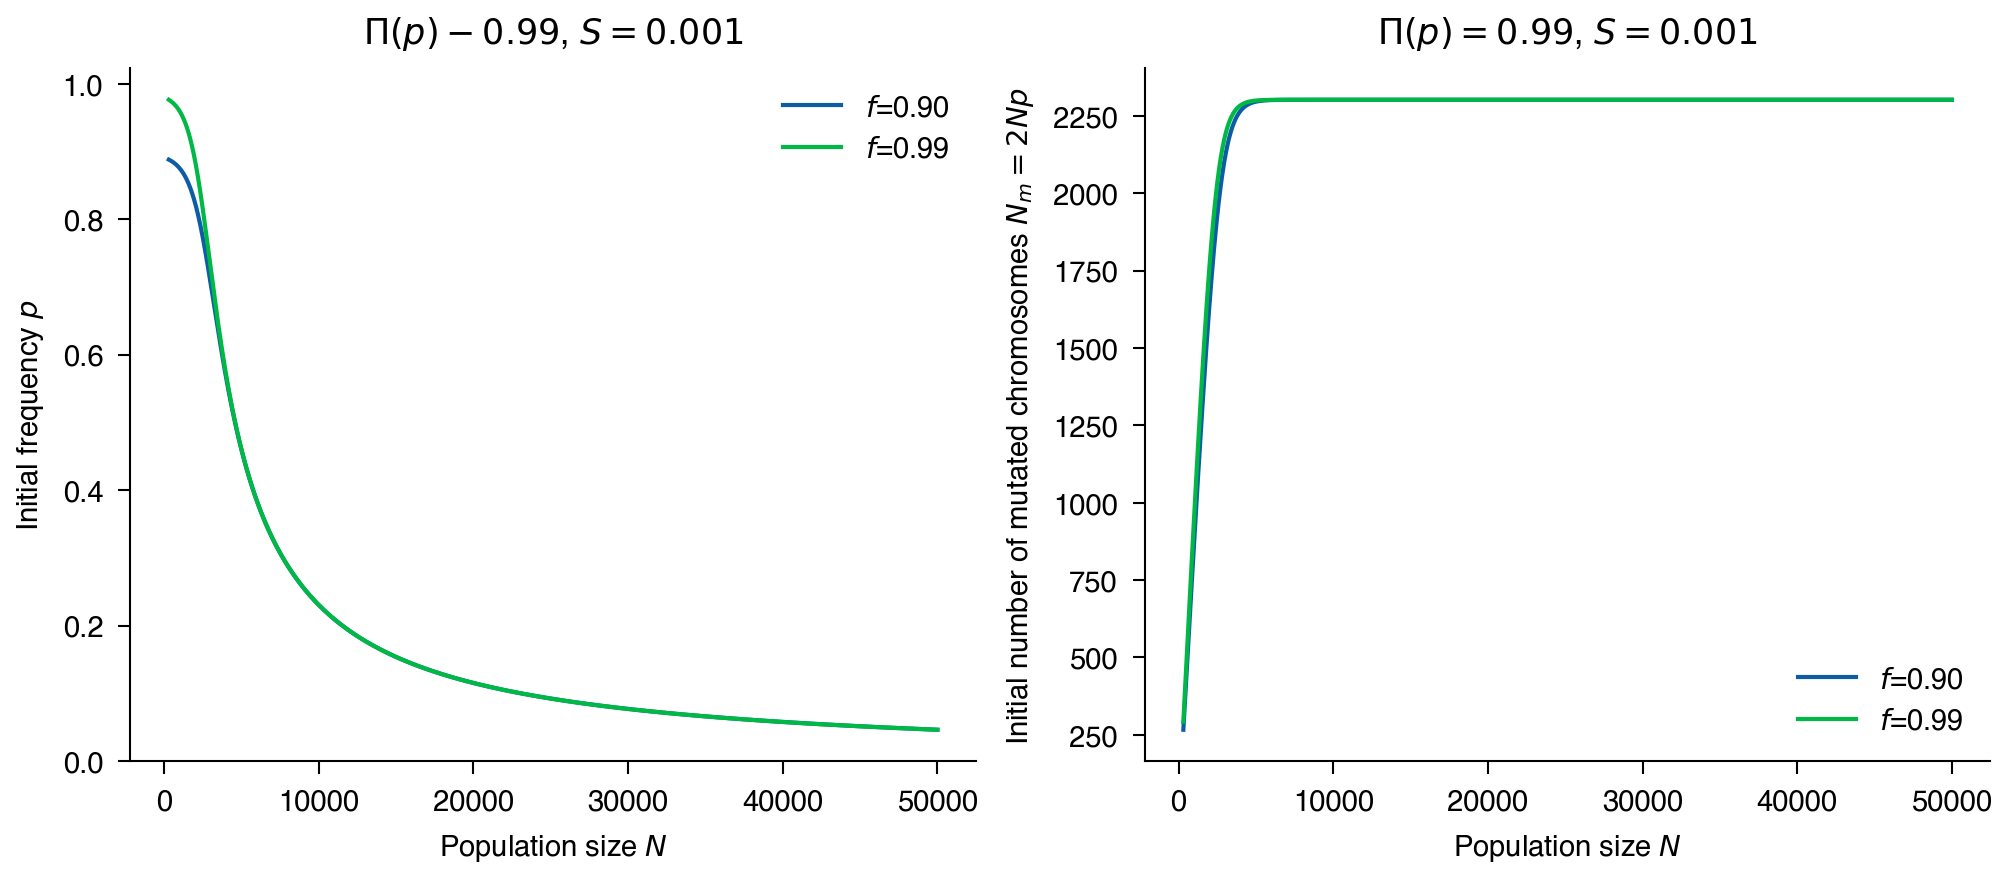

In [311]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

N = np.arange(300,5e4)
S = 0.001
f = 0.90

for f in [0.90,0.99]:
    p_fixation = 0.99
    ax[0].set_ylabel(r"Initial frequency $p$")
    ax[0].set_xlabel("Population size $N$")
    ax[0].set_title(r"$\Pi(p)-0.99$, $S=0.001$")
    sns.lineplot(x=N,y=initial_freq_near_fixation(N,S,f,p_fixation),ax=ax[0],
                 label=f"$f$={f:.2f}")

    ax[1].set_ylabel(r"Initial number of mutated chromosomes $N_m=2Np$")
    ax[1].set_xlabel("Population size $N$")
    ax[1].set_title(r"$\Pi(p)=0.99$, $S=0.001$")
    sns.lineplot(x=N,y=N*initial_freq_near_fixation(N,S,f,p_fixation),ax=ax[1],
                 label=f"$f$={f:.2f}")


The actual number of mutated chromosomes $N_m=2Np$
$$N_m=Np=-\frac{1}{S}\ln[1-\Pi(p)\left(1-e^{-2NSf}\right)]$$

In the limit of large $N$, the exponent term $e^{-2NSf}\to 0$, and the actual number of mutated chromosomes will not depend on the population size.
$$\lim_{N\to\infty}N_m=-\frac{1}{S}\ln[1-\Pi(p)]$$

The initial frequency for near-fixation decreases with population size. For large populations, mutations that exceed a constant threshold $N_m$ are fixed with high (99\%) probability.

# Problem 2
## Problem 2 a

In [312]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

In [313]:
df = pd.read_csv("./pset_2_assets/times.csv",index_col=0)
df["Parent_Mid"] = (df["Parent_1"]+df["Parent_2"])/2

Maternal and paternal genotypes are independent. For this section of the question, we are interested in the effects of genotype only, ignore covariance of maternal-offspring environment and the covariance of offspring genotype-environment. Assume no dominance, such that the covariance in the allele $\text{Cov}(M,M^\prime)$ is zero.

$$\text{Cov}(M,O)=\cancel{\text{Cov}(X_P,X_M)}+\text{Cov}(X_M,X_M)+\cancel{\text{Cov}(X_P,X_{M^\prime})}+\text{Cov}(X_M,X_{M^\prime})+\text{Cov}(X_O,E_O)+\text{Cov}(E_M,E_O)$$

$$\text{Cov}(M,O)=\text{Cov}(X_M,X_M)=\text{Var}(X_M)=\frac{V_A}{2}$$

$$\text{Var}({M})=\text{Var}({P})=\text{Var}({O})=V_\text{Phenotype}$$

$$\text{CorrCoef}(M,O)=\frac{\text{Cov}(M,O)}{\sqrt{\text{Var}(M)\text{Var}(O)}}=\frac{V_A/2}{V_{\mathrm{Phenotype}}}=\frac{h^2}{2}$$

$$X_\text{Mid}=\frac{X_P+X_M}{2}$$
$$\text{Var}(\text{Mid})=\frac{2\text{Var}(X)}{4}=\frac{V_\text{Phenotype}}{2}$$

$$\text{CorrCoef}(M,\text{Mid})=\frac{\text{Cov}(M,O)}{\sqrt{\text{Var}(\text{Mid})\text{Var}(O)}}=\frac{V_A/2}{V_{\mathrm{Phenotype}}/\sqrt{2}}=\frac{h^2}{\sqrt{2}}$$

In [314]:
def reg(x, y, factor, **kwargs):
    """https://stackoverflow.com/questions/67268096
    how-to-display-pearsonr-squared-and-regression-equation-on-a-pairplot
    """
    ax = plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
    # r=((x-x.mean())*(y-y.mean())).sum()/np.sqrt((((x-x.mean())**2).sum()*((y-y.mean())**2).sum()))
    ax.annotate((f'$r ={r_value:.2f}$\n$\hat y={slope:.2f}x{intercept:+.2f}$'
                 f'\n$h^2={factor*r_value:.2f}$'),
                xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                color='black', ha='left', va='top')

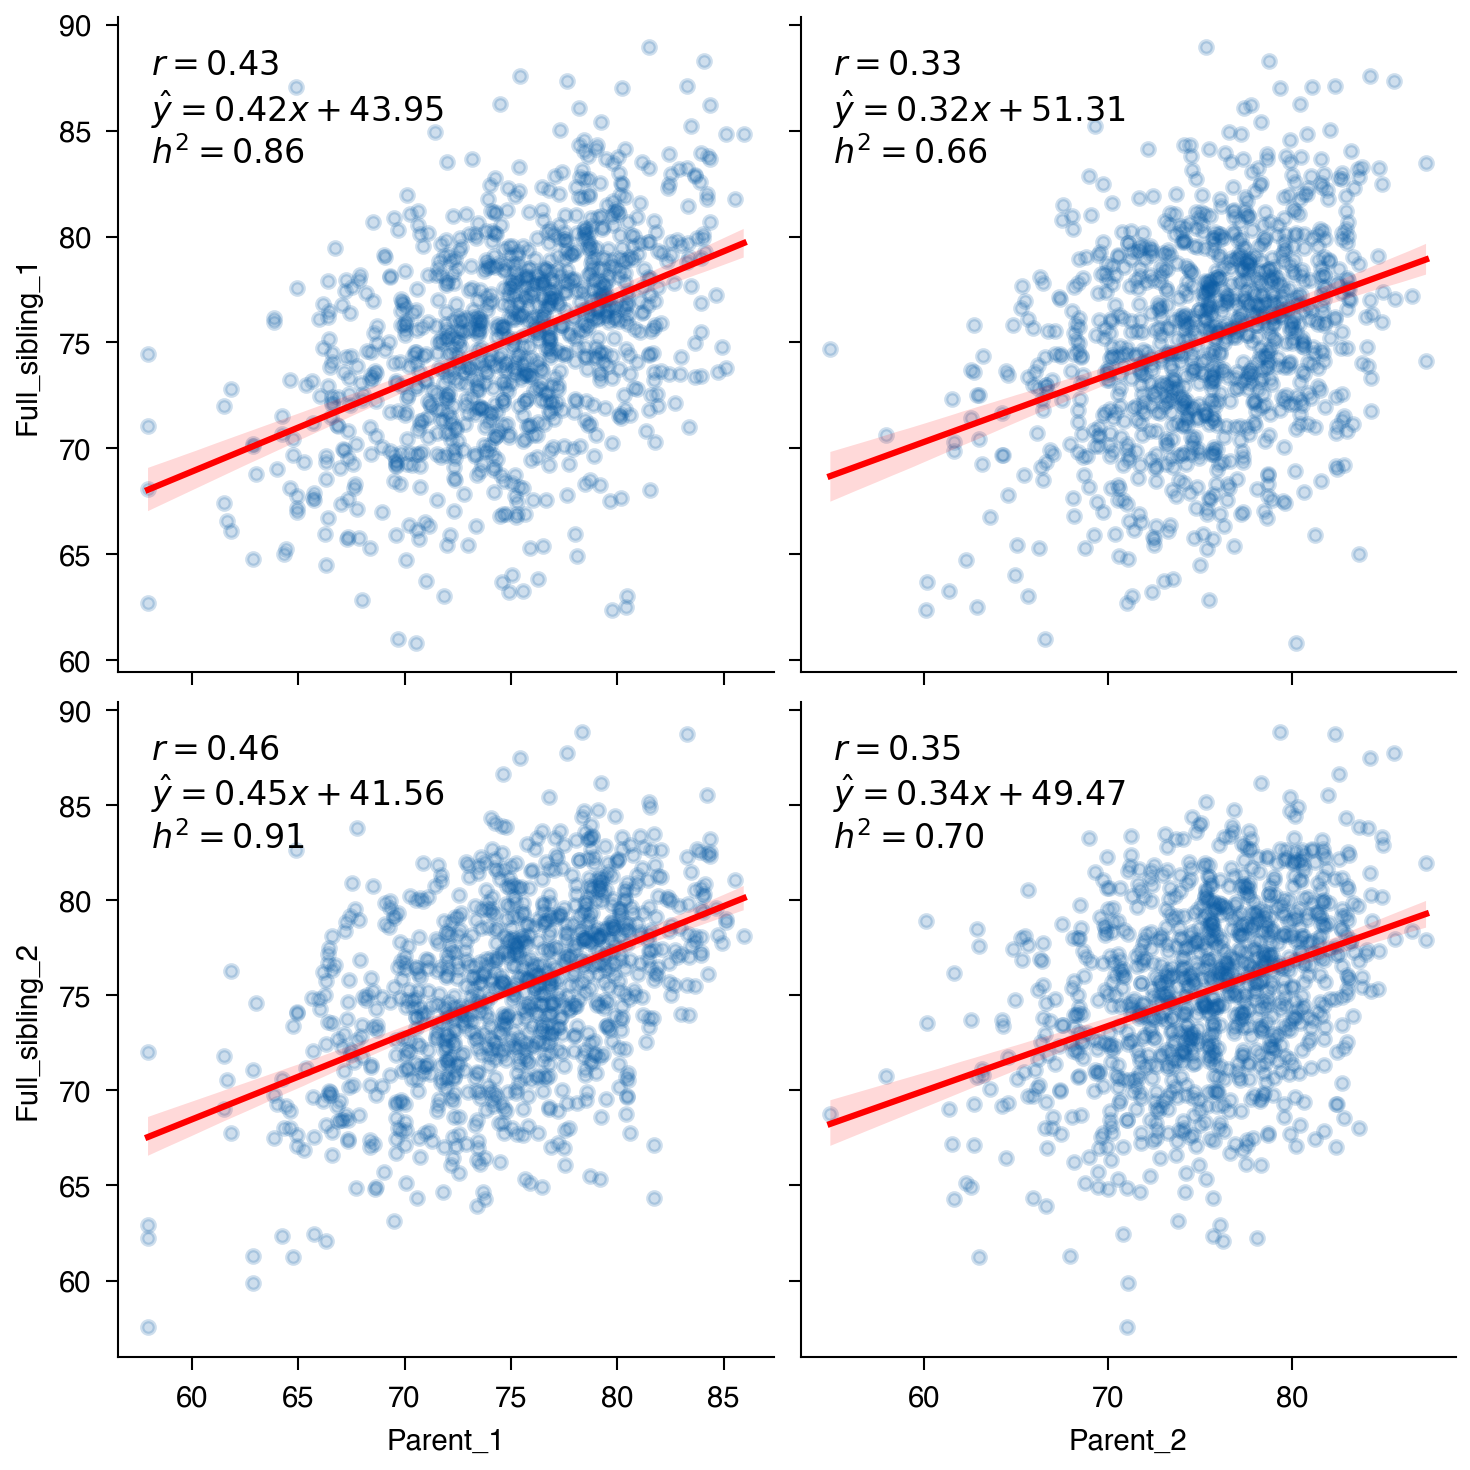

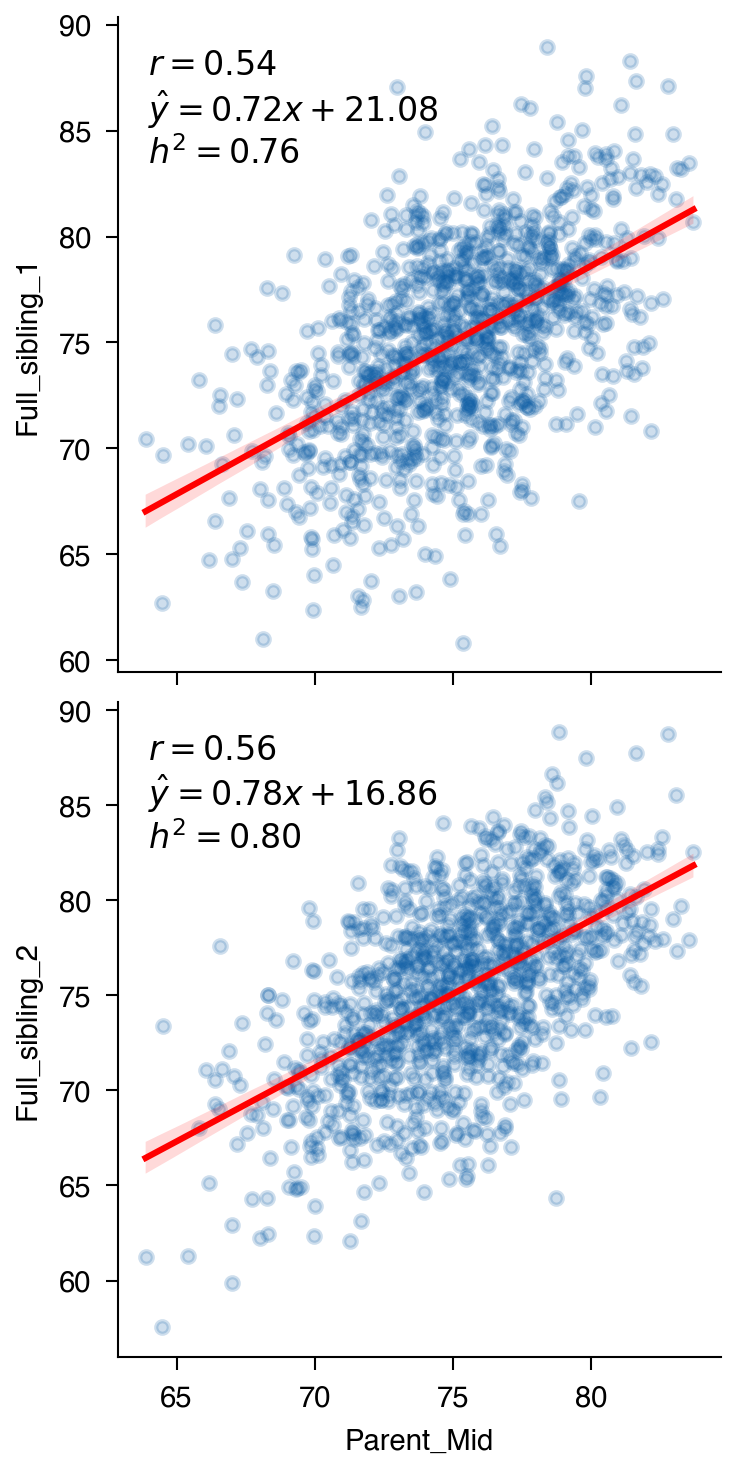

In [315]:
#| fig-cap: Problem 2 a
#| layout-ncol: 2
#| column: page
g = sns.pairplot(df,x_vars=["Parent_1","Parent_2"],
                 y_vars=["Full_sibling_1","Full_sibling_2"],
                 kind="reg",
                 plot_kws={'line_kws':{'color':'red'},
                           'scatter_kws': {'alpha': 0.2}})
g.map(lambda x, y, **kwargs: reg(x, y, 2, **kwargs));

g = sns.pairplot(df,x_vars=["Parent_Mid"],
                 y_vars=["Full_sibling_1","Full_sibling_2"],
                 kind="reg",
                 plot_kws={'line_kws':{'color':'red'},
                           'scatter_kws': {'alpha': 0.2}})
g.map(lambda x, y, **kwargs: reg(x, y, np.sqrt(2), **kwargs));

## Problem 2 b

Assuming no dominance and independent parental genotypes. Not ignoring environmental variance:
$$\text{Cov}(M,O)=\text{Var}(X_M)+\text{Cov}(X_O,E_O)+\text{Cov}(E_M,E_O)$$
$$\text{Var}(X_M)=\frac{V_A}{2}$$
$$h^2_E=\frac{V_A}{V_{\mathrm{Phenotype}}}=\frac{2\text{Cov}(M,O)}{\sqrt{\text{Var}(M)\text{Var}(O)}}-\frac{2(\text{Cov}(X_O,E_O)+\text{Cov}(E_M,E_O))}{\sqrt{\text{Var}(M)\text{Var}(O)}}<h^2_{\text{No }E}$$

In the presence of environmental variance, there is an environmental contribution to the covariance of the dataset, decreasing the genotype variance estimated from the dataset, resulting in a decrease in the heritability.

### Case E1: Simulating $E_{M/P} = E_{O_1/O_2}$


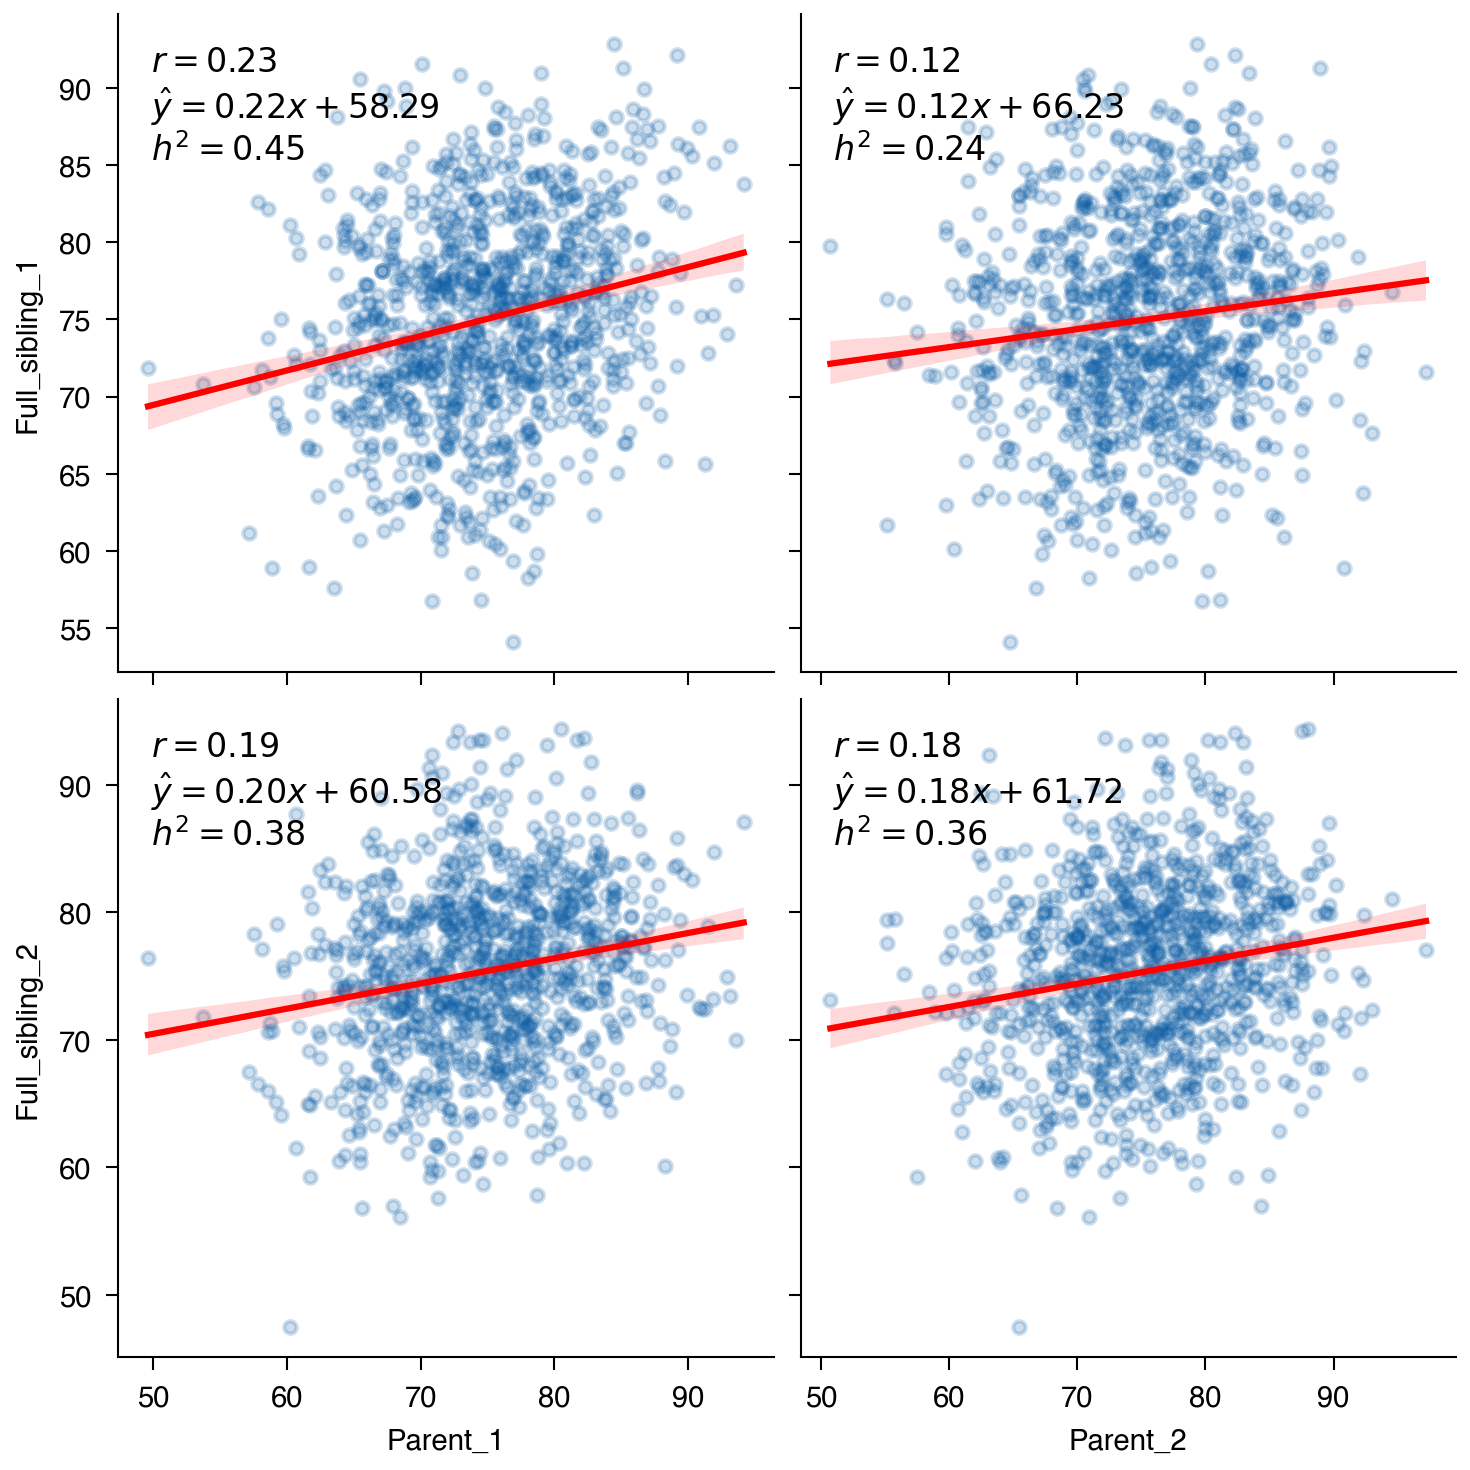

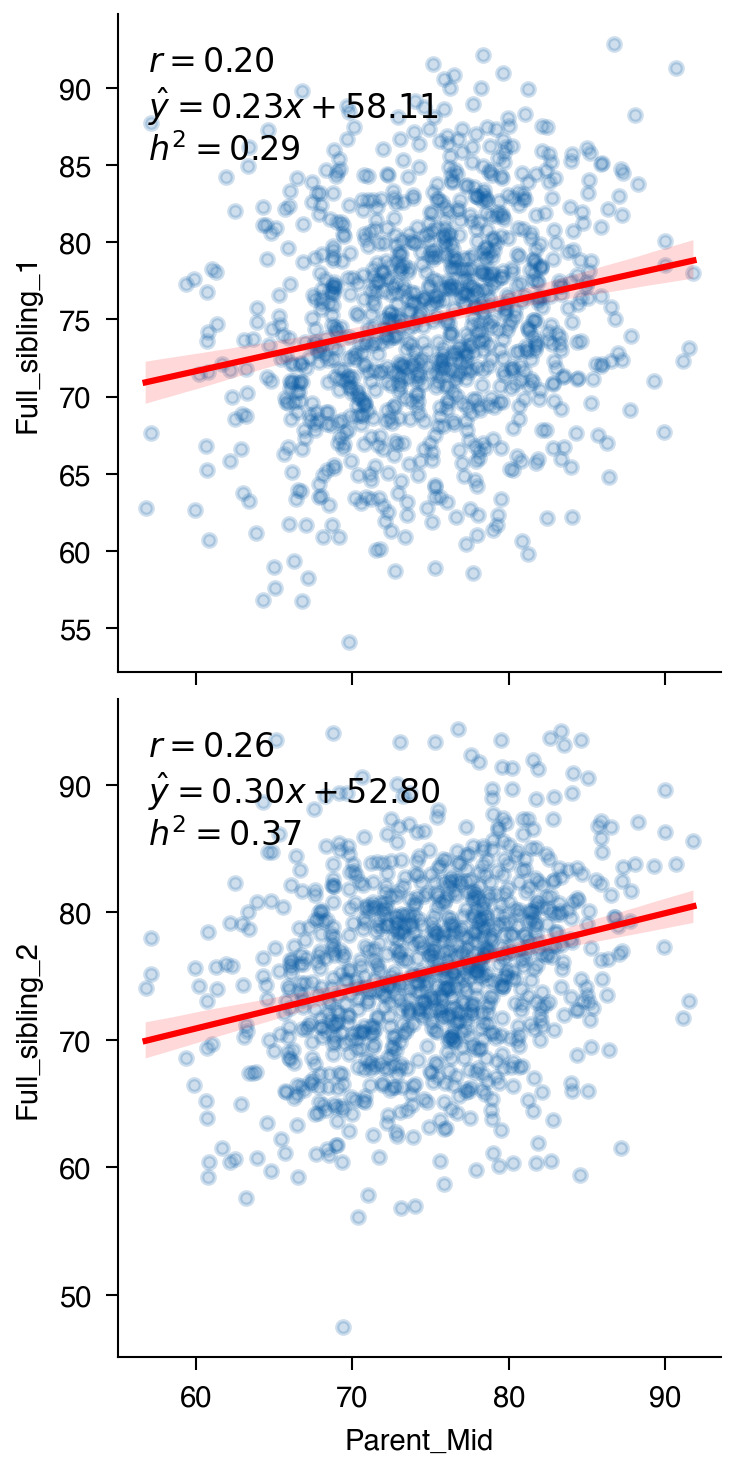

In [316]:
#| fig-cap: Problem 2 b Case E1
#| layout-ncol: 2
#| column: page
mu = 0
std = 5
df_case_E1 = df+np.random.normal(mu,std,df.shape)

g = sns.pairplot(df_case_E1,x_vars=["Parent_1","Parent_2"],
                 y_vars=["Full_sibling_1","Full_sibling_2"],
                 kind="reg",
                 plot_kws={'line_kws':{'color':'red'},
                           'scatter_kws': {'alpha': 0.2}})
g.map(lambda x, y, **kwargs: reg(x, y, 2, **kwargs));

g = sns.pairplot(df_case_E1,x_vars=["Parent_Mid"],
                 y_vars=["Full_sibling_1","Full_sibling_2"],
                 kind="reg",
                 plot_kws={'line_kws':{'color':'red'},
                           'scatter_kws': {'alpha': 0.2}})
g.map(lambda x, y, **kwargs: reg(x, y, np.sqrt(2), **kwargs));

The heritability decreases

### Case E2: Simulating $E_{M/P} > E_{O_1/O_2}$

In [317]:
def noise_PO(df,std_P,std_O):
    for column in df.columns:
        if column.startswith("Parent"):
            mu = 0
            std = std_P
            df[column] += np.random.normal(mu,std,df.shape[0])
        elif column.startswith("Full_sibling"):
            mu = 0
            std = std_O
            df[column] += np.random.normal(mu,std,df.shape[0])

    g = sns.pairplot(df,x_vars=["Parent_1","Parent_2"],
                    y_vars=["Full_sibling_1","Full_sibling_2"],
                    kind="reg",
                    plot_kws={'line_kws':{'color':'red'},
                            'scatter_kws': {'alpha': 0.2}})
    g.map(lambda x, y, **kwargs: reg(x, y, 2, **kwargs));

    g = sns.pairplot(df,x_vars=["Parent_Mid"],
                    y_vars=["Full_sibling_1","Full_sibling_2"],
                    kind="reg",
                    plot_kws={'line_kws':{'color':'red'},
                            'scatter_kws': {'alpha': 0.2}})
    g.map(lambda x, y, **kwargs: reg(x, y, np.sqrt(2), **kwargs));

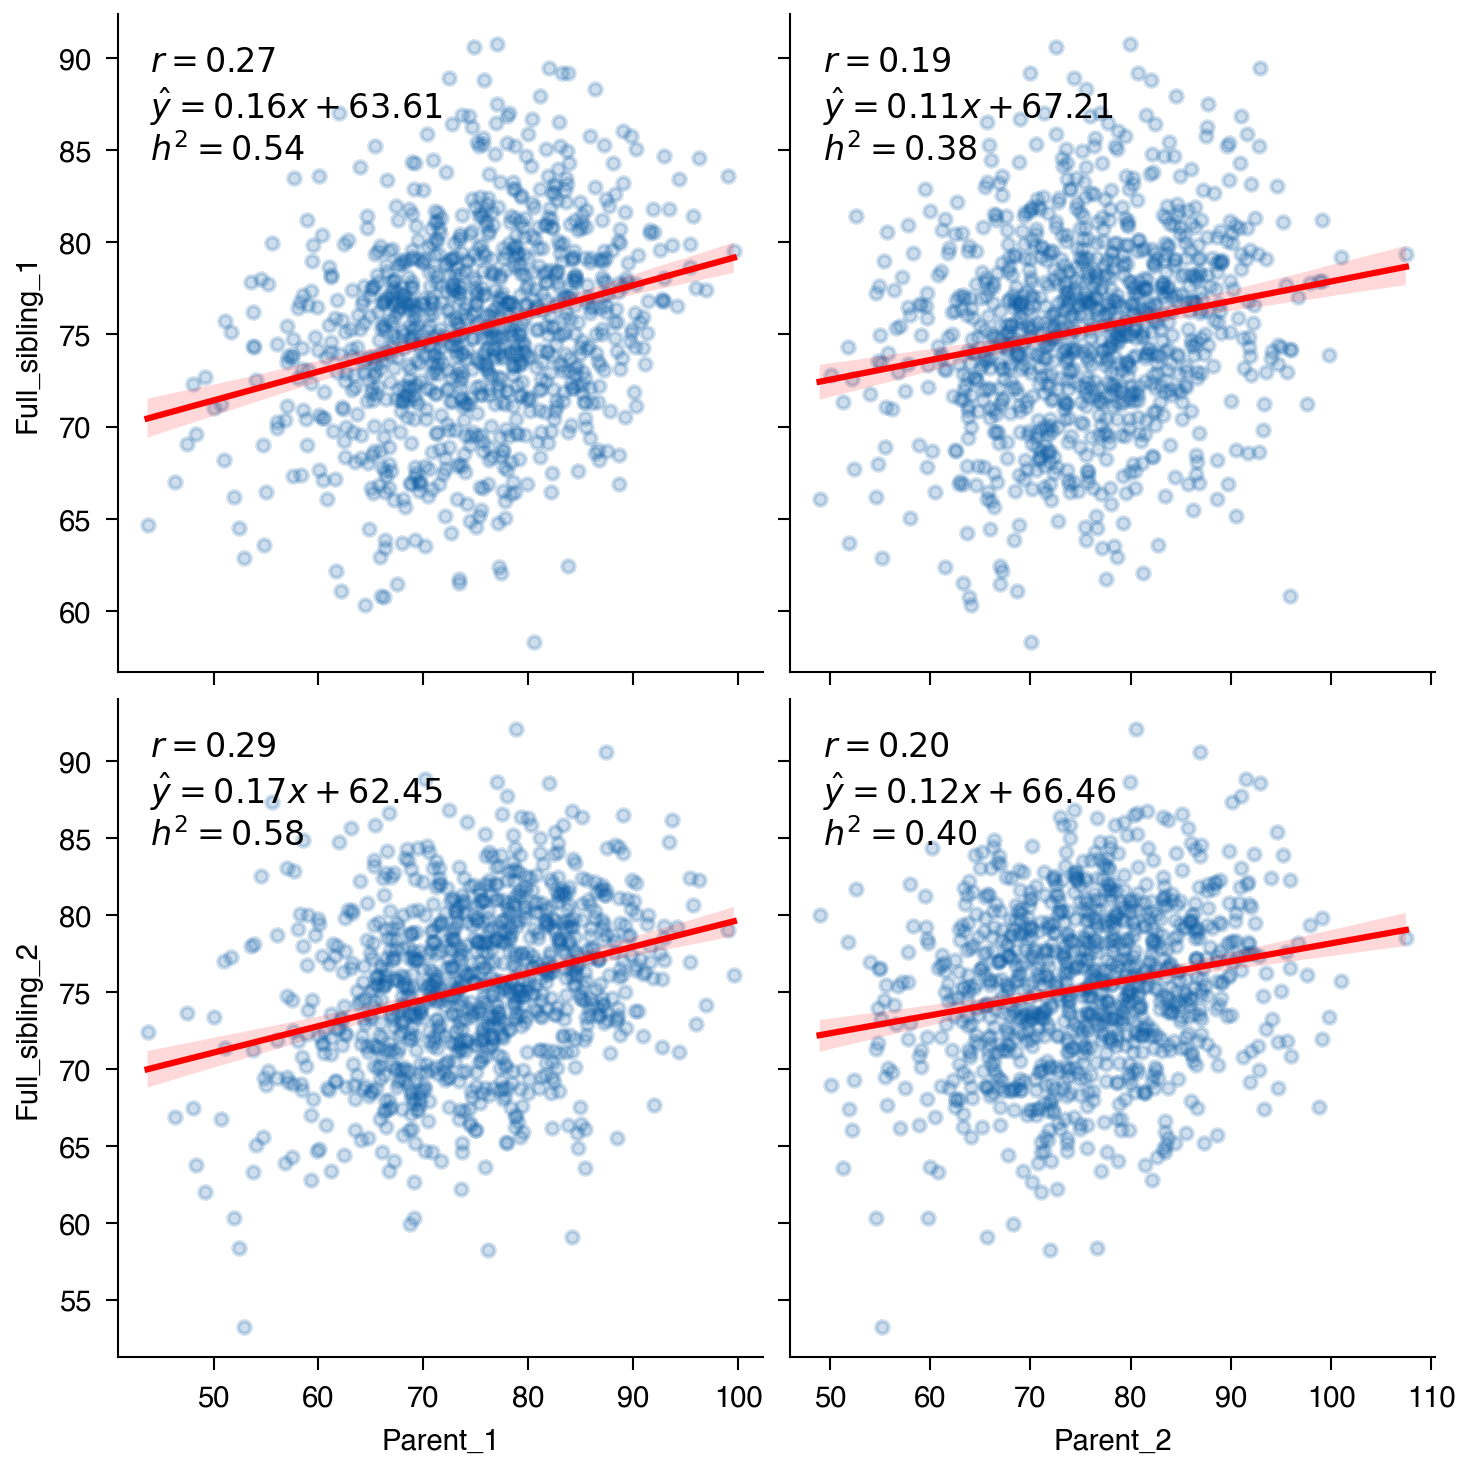

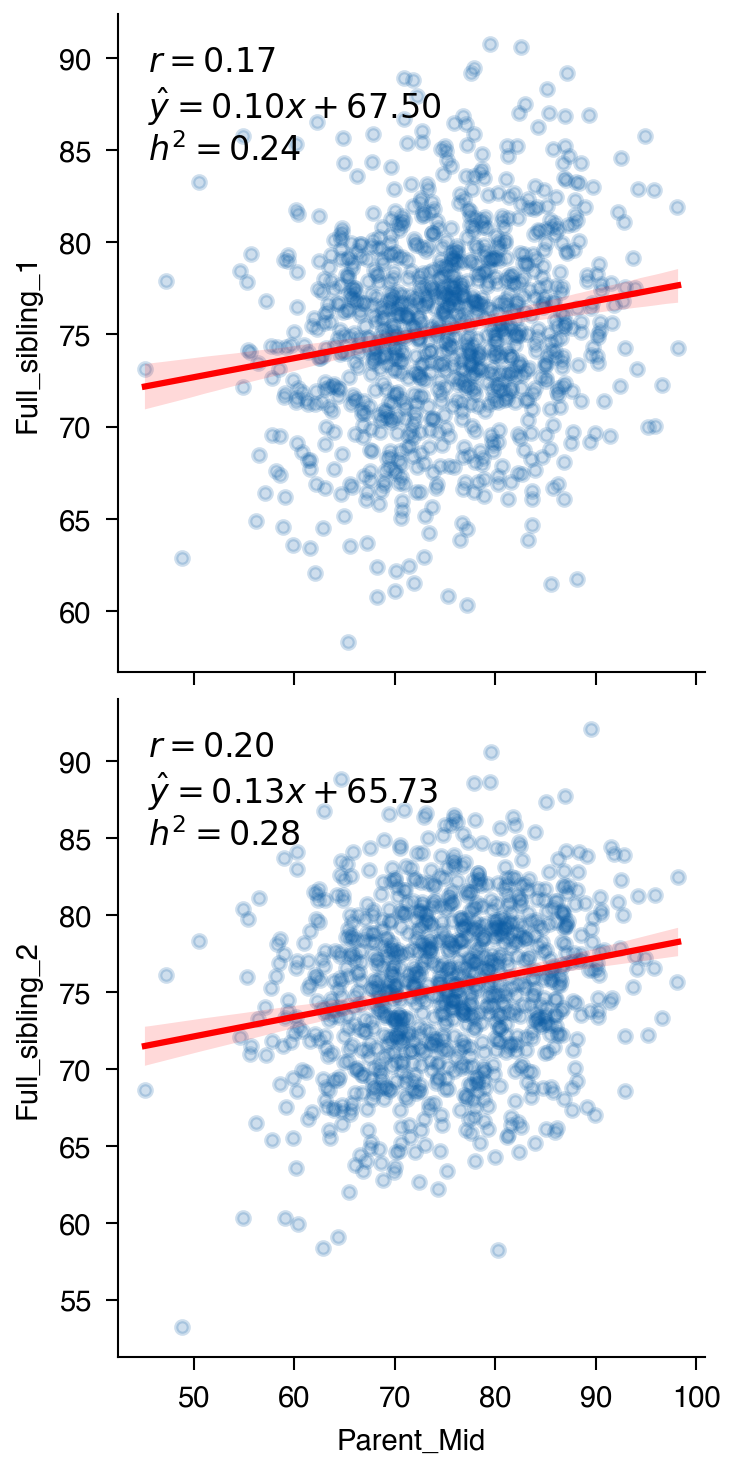

In [318]:
#| fig-cap: Problem 2 b Case E2
#| layout-ncol: 2
#| column: page
noise_PO(df.copy(),7.5,2.5)

### Case E3: Simulating $E_{M/P} < E_{O_1/O_2}$

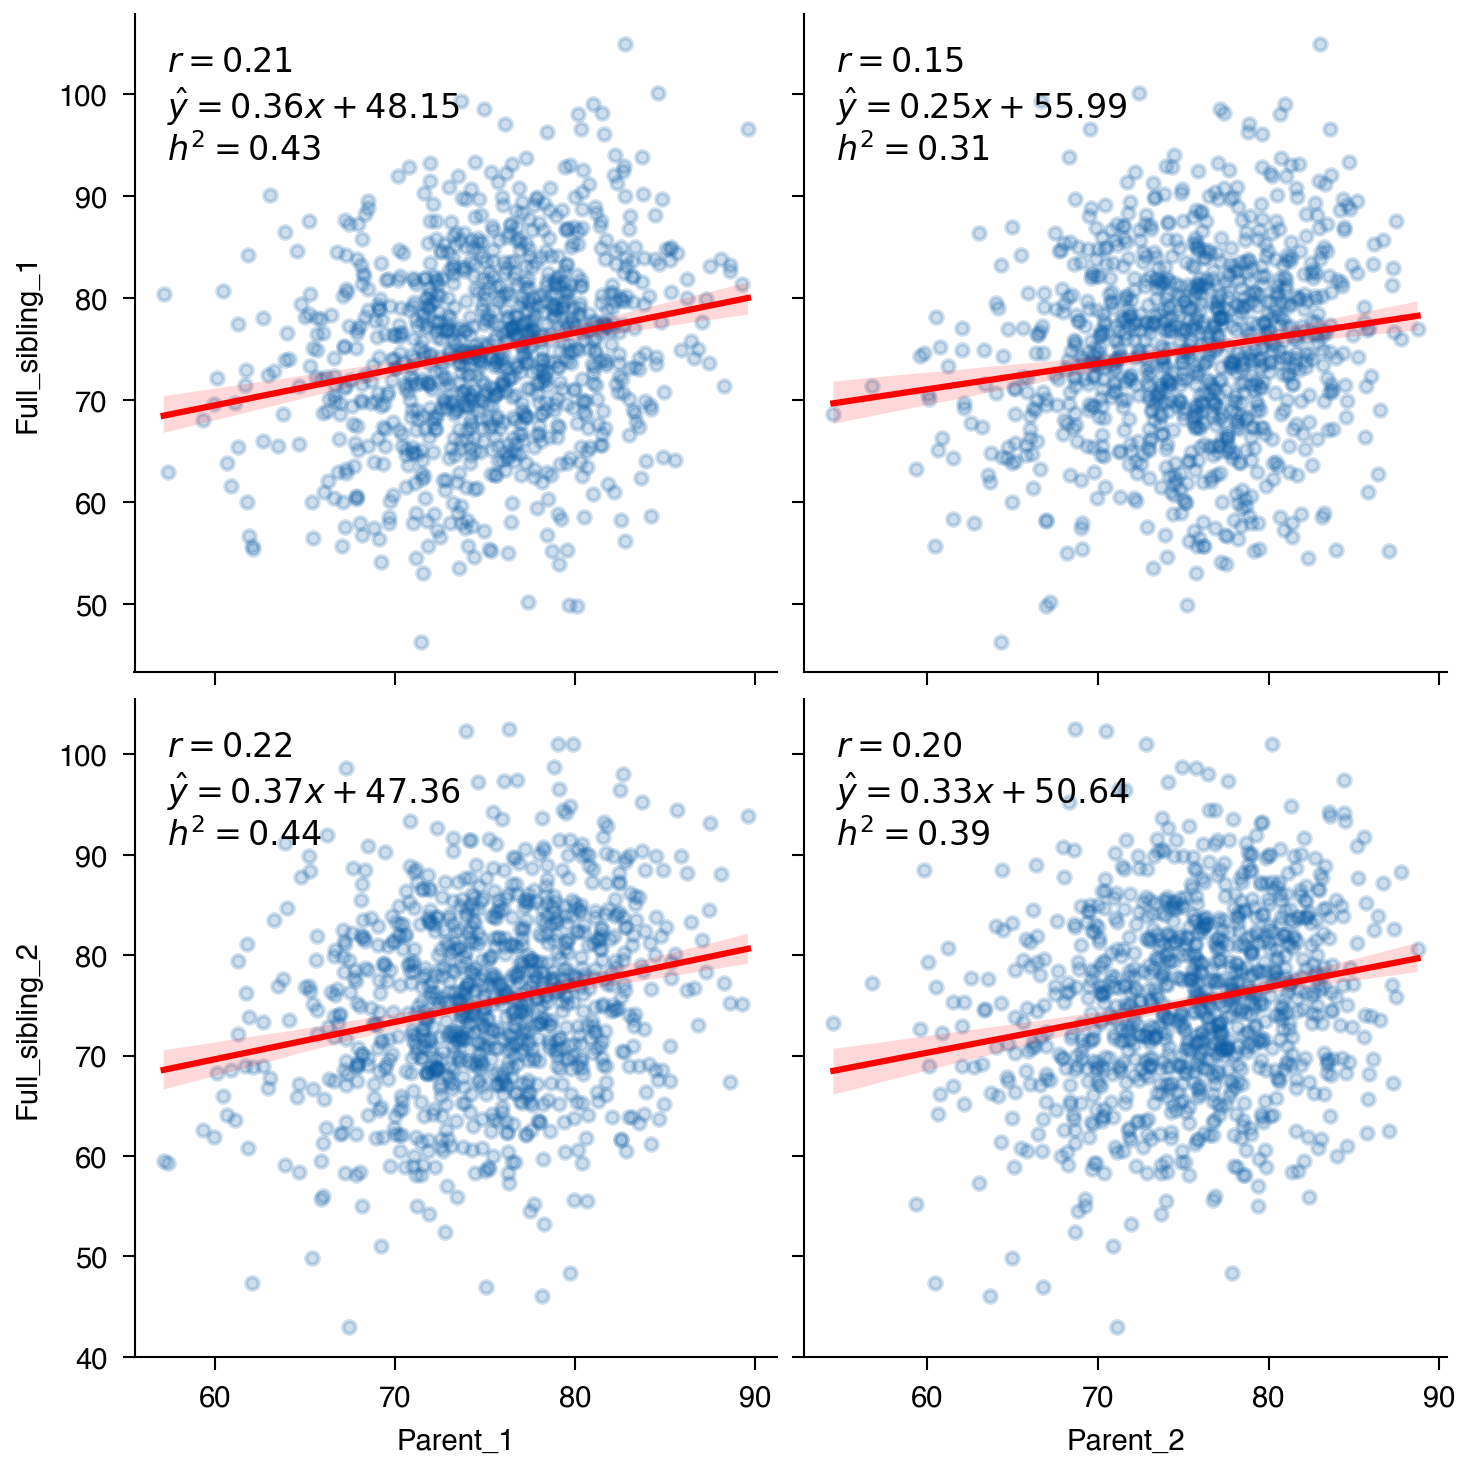

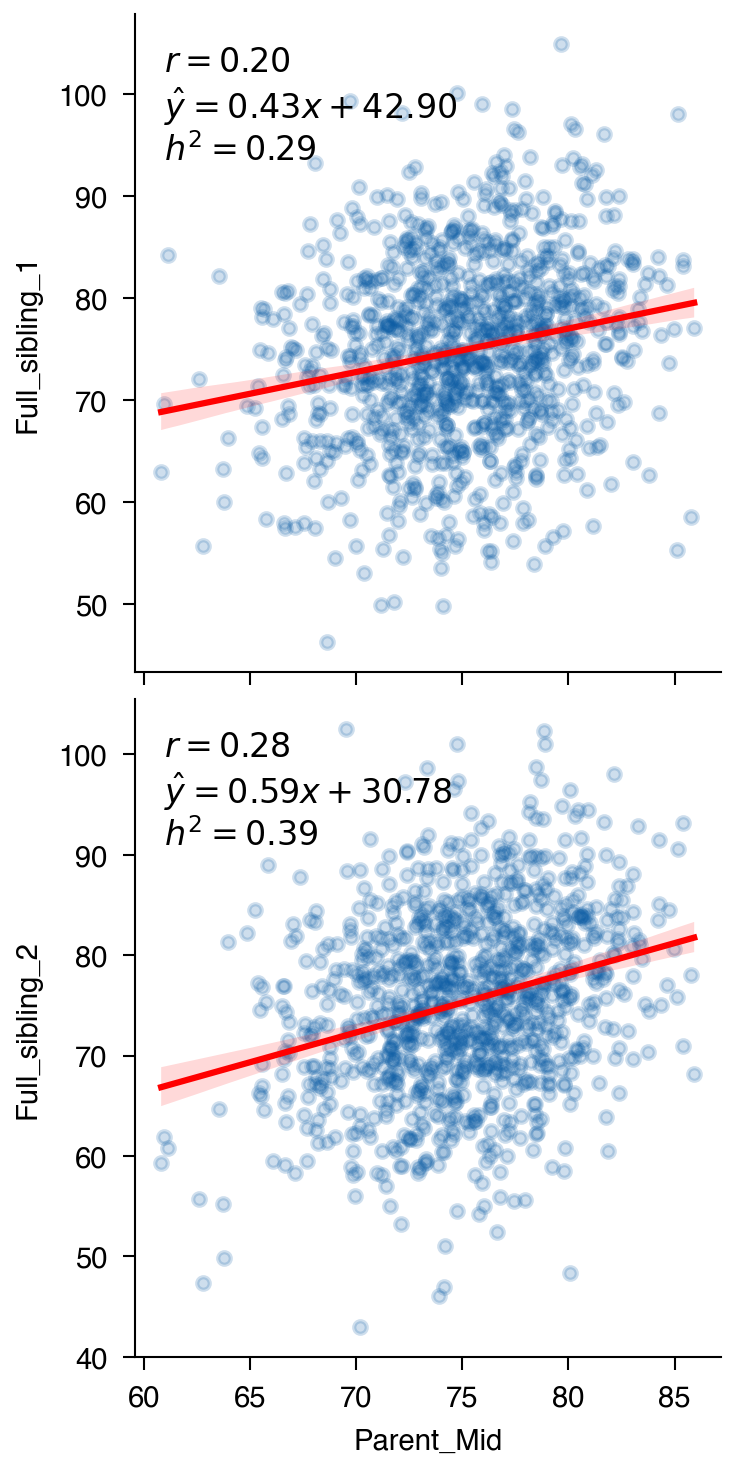

In [319]:
#| fig-cap: Problem 2 b Case E3
#| layout-ncol: 2
#| column: page
noise_PO(df.copy(),2.5,7.5)

### Case E4: Simulating $E_{O_1} > E_{O_2}$

In [320]:
def noise_O1O2(df,std_O1,std_O2):
    for column in df.columns:
        if column.startswith("Full_sibling_1"):
            mu = 0
            std = std_O1
            df[column] += np.random.normal(mu,std,df.shape[0])
        elif column.startswith("Full_sibling_2"):
            mu = 0
            std = std_O2
            df[column] += np.random.normal(mu,std,df.shape[0])

    g = sns.pairplot(df,x_vars=["Parent_1","Parent_2"],
                    y_vars=["Full_sibling_1","Full_sibling_2"],
                    kind="reg",
                    plot_kws={'line_kws':{'color':'red'},
                            'scatter_kws': {'alpha': 0.2}})
    g.map(lambda x, y, **kwargs: reg(x, y, 2, **kwargs))
    g.fig.set_figheight(4)


    g = sns.pairplot(df,x_vars=["Parent_Mid"],
                    y_vars=["Full_sibling_1","Full_sibling_2"],
                    kind="reg",
                    plot_kws={'line_kws':{'color':'red'},
                            'scatter_kws': {'alpha': 0.2}})
    g.map(lambda x, y, **kwargs: reg(x, y, np.sqrt(2), **kwargs))
    g.fig.set_figheight(4);

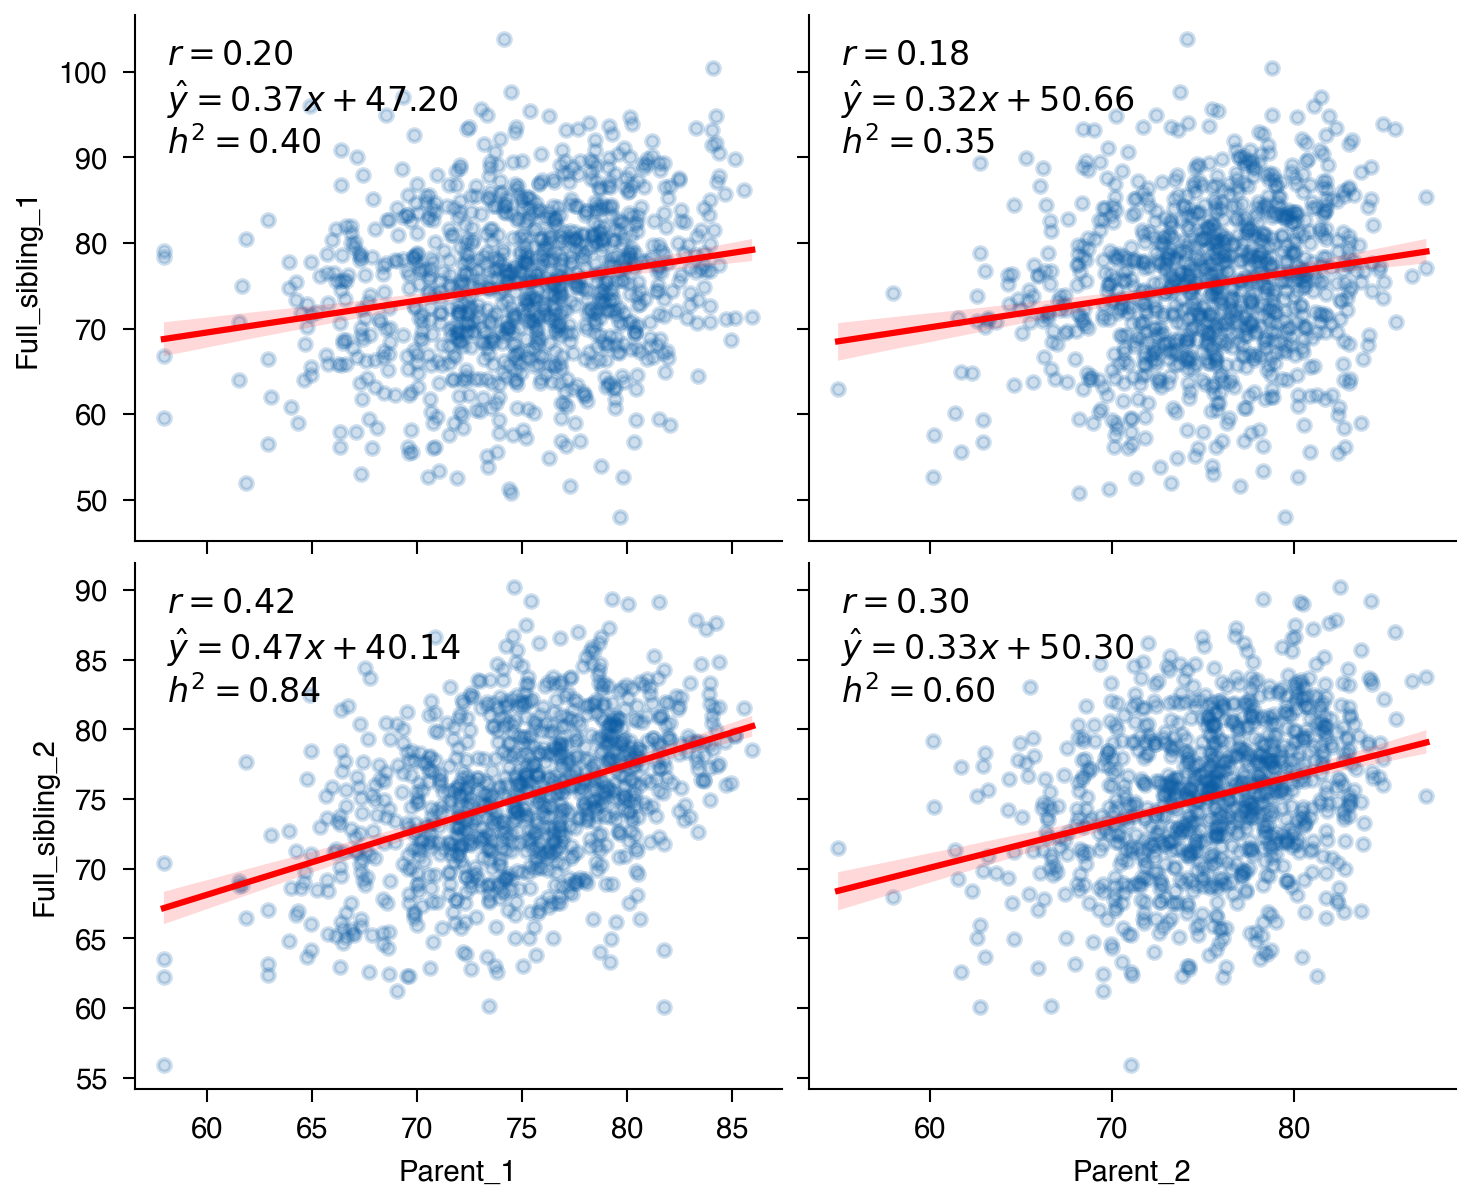

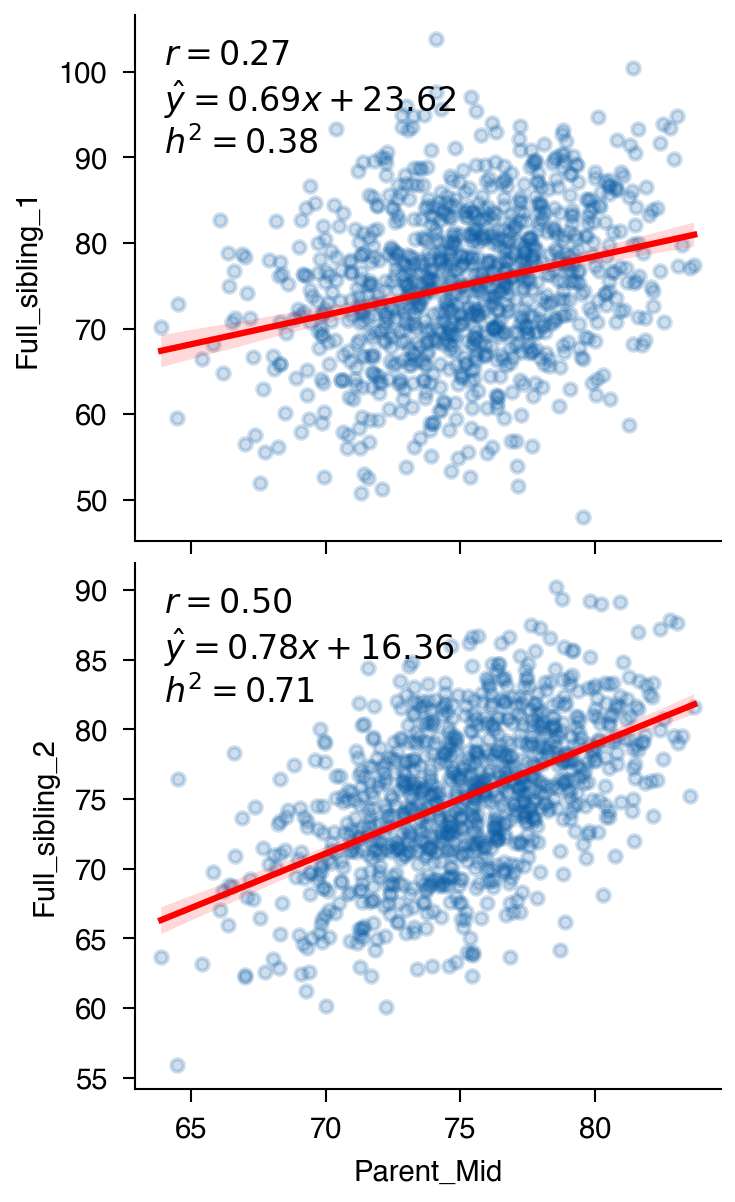

In [321]:
#| fig-cap: Problem 2 b Case E4
#| layout-ncol: 2
#| column: page
noise_O1O2(df.copy(),7.5,2.5)

### Case E5: Simulating $E_{O_1} < E_{O_2}$

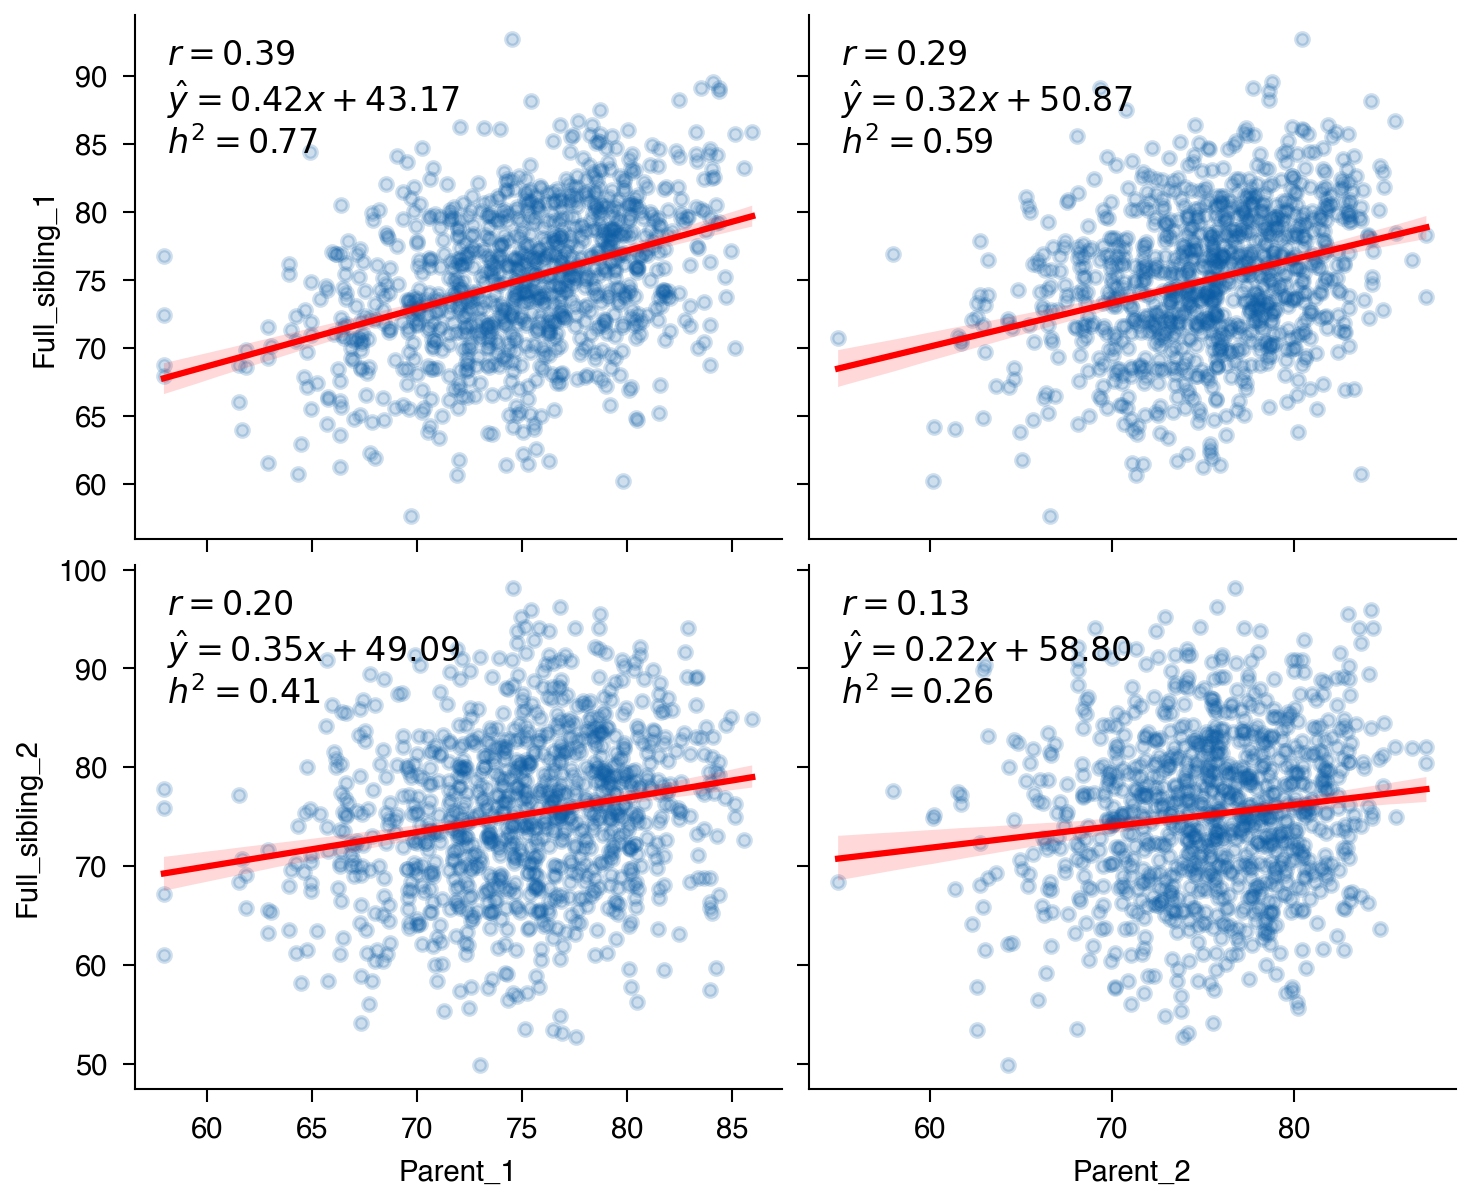

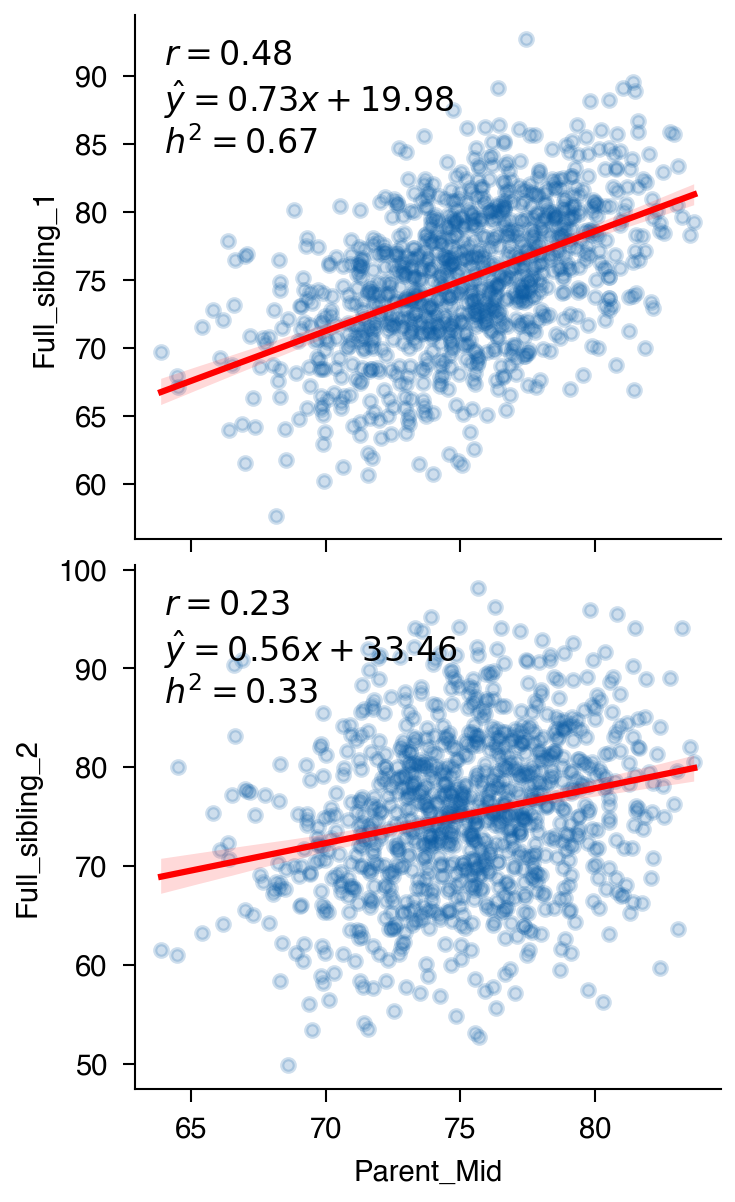

In [322]:
#| fig-cap: Problem 2 b Case E5
#| layout-ncol: 2
#| column: page
noise_O1O2(df.copy(),2.5,7.5)